# Introduction to Image Processing
 Mojdeh Rastgoo - Desire Sidibe

## 2. Image Enhancement

In this practice first, we will dig into the different basic transformation functions which allows to improve the contrast of grey scale images. All these functions are part of the `exposure` module of `skimage`.

In [3]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io

Pretty printing has been turned OFF


**Q.1 Import the exposure module of skimag **

In [9]:
from skimage import img_as_float, exposure as exp

### 2.1 Log transformations in skimage

The log transformation increases the contrast of the low intensities in an image by stretching a narrow range of these low intensities into a wider range of intensities. However, the opposite is taking place regarding the high intensities.

Refer to [`exposure.adjust_log()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-log) for the use of this function.

We recall the transformation function $s = c \log(1 + r)$. We illustrate this transformation by varying the parameter $c$.

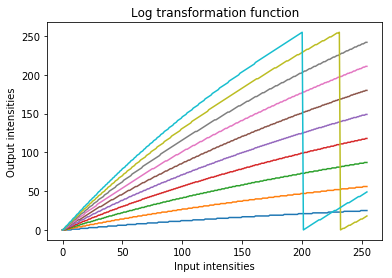

In [4]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(255, dtype='uint8')

# Define the parameter c
c = np.linspace(.1, 1.2, num=10)

# Plot the transform function
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()

**Q.2 Now this is your turn to make this transformation on a real image by using lena-im-float.
Show the original image and its histogram and also the transformed image and its histogram in a subplot figures. 
Transform the image twice with `gains=[0.9 , 1]`
**

In [48]:
img_path = "./images/"
img_names = ["lena-grey.bmp", "satellite.jpg", "vibot-color.jpg", "angle_0.bmp", "bin_image.png"]
img_lena = io.imread(img_path + img_names[0])
img_lena_flt = img_as_float(img_lena)

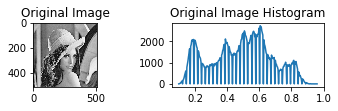

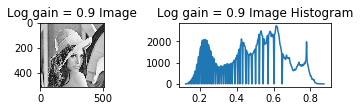

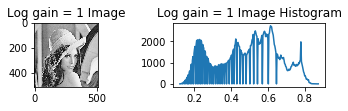

In [28]:
#htm_lena = exp.histogram(img_lena)
htm_lena_flt = exp.histogram(img_lena_flt, 256)
plt.subplots(nrows = 1, ncols = 2)
plt.subplot(3, 2, 1)
plt.imshow(img_lena_flt, cmap = cm.Greys_r)
plt.title("Original Image")
plt.subplot(3, 2, 2)
plt.plot(htm_lena_flt[1], htm_lena_flt[0])
plt.title("Original Image Histogram")
plt.show()

#transform logarythmic
img_lena_log09 = exp.adjust_log(img_lena_flt, gain = 0.9)
htm_lena_log09 = exp.histogram(img_lena_log09)

plt.subplot(3, 2, 3)
plt.imshow(img_lena_log09, cmap = cm.Greys_r)
plt.title("Log gain = 0.9 Image")
plt.subplot(3, 2, 4)
plt.plot(htm_lena_log09[1], htm_lena_log09[0])
plt.title("Log gain = 0.9 Image Histogram")
plt.show()

img_lena_log10 = exp.adjust_log(img_lena_flt, gain = 1)
htm_lena_log10 = exp.histogram(img_lena_log10)
plt.subplot(3, 2, 5)
plt.imshow(img_lena_log09, cmap = cm.Greys_r)
plt.title("Log gain = 1 Image")
plt.subplot(3, 2, 6)
plt.plot(htm_lena_log09[1], htm_lena_log09[0])
plt.title("Log gain = 1 Image Histogram")
plt.show()

<div class="alert alert-info">

<b>Note</b>:
A good example where you can see the improvement and changes is to use the magnitude of the  Discrete Fourier Transform (DFT) of the image.
In order to get this image: 
1. Apply the `np.fft.fft2()` to get the fourier image
2. Magnitute are provided by the absolute values of this image
3. In order to move the center of the frequency to the center of the image we can apply `np.fft.fftshift()`

Now you can repeat the previous process on the magnitude image. 
</div>

In [46]:
# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(img_lena_flt)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))

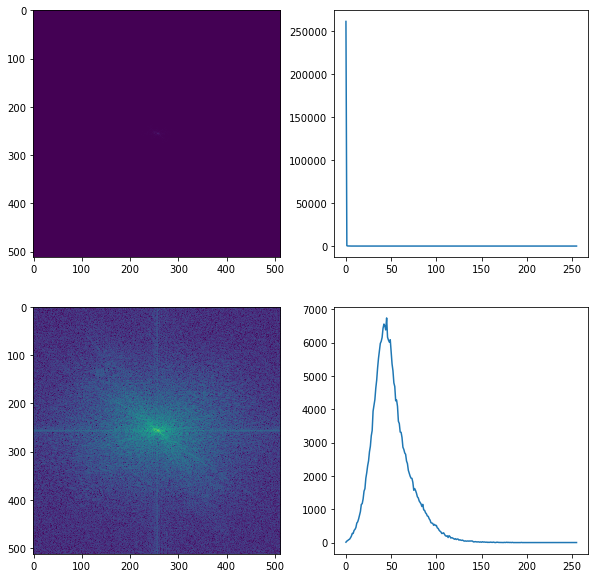

In [47]:
# Show the image and its histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(lena_im_mag)

bins, bins_c = np.histogram(lena_im_mag, 256)
ax1.plot(bins)

# Apply a logarithm transformation
gain = 1.
lena_im_mag_log = exposure.adjust_log(lena_im_mag, gain=gain)
# Show the image after transformation and its transformation
ax2.imshow(lena_im_mag_log)
bins, bins_c = np.histogram(lena_im_mag_log, 256)
ax3.plot(bins)
#n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())),
#                            normed=1, histtype='stepfilled')

### 2.2 Power-Law (Gamma) transformation in skimage

By looking at the log transformation formulation, there is no ideal way to change the slope of the function. The gamma transformation offer this modulation using a parameter $\gamma$. The transformation function can be formulated as $s = cr^{\gamma}$.

We illustrate this transformation by varying the parameter $\gamma$.

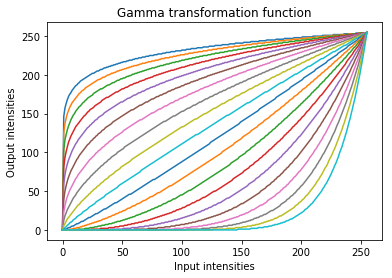

In [9]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='uint8')

# Define the parameter c
gamma = np.logspace(-1, 1., num=20)

# Plot the transform function
plt.figure()
for g in gamma:
    plt.plot(x, exposure.adjust_gamma(x, gamma=g, gain=1.))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Gamma transformation function')
plt.axis('tight')
plt.show()

**Q.3 Use the gamma function to enhance the  magnitude image of lena for 10 different values of $\gamma$.**

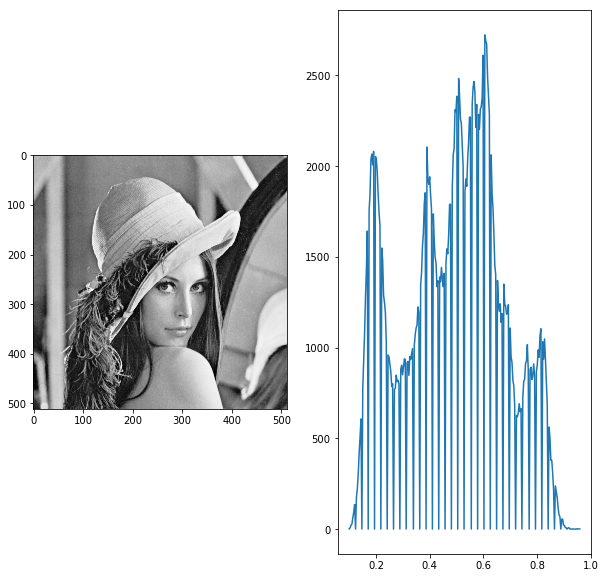

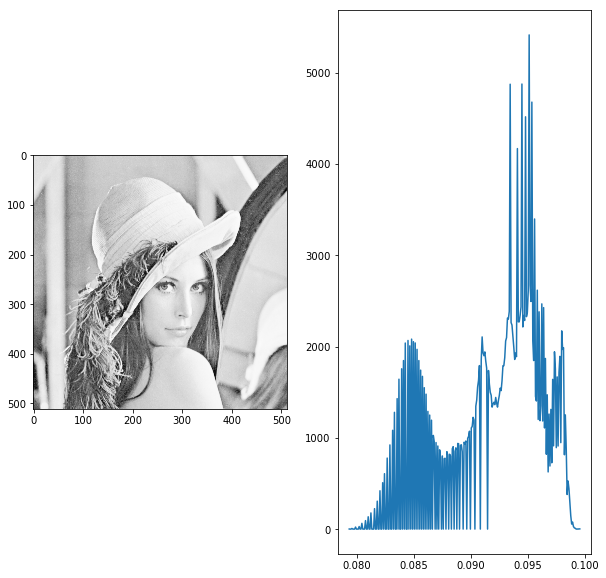

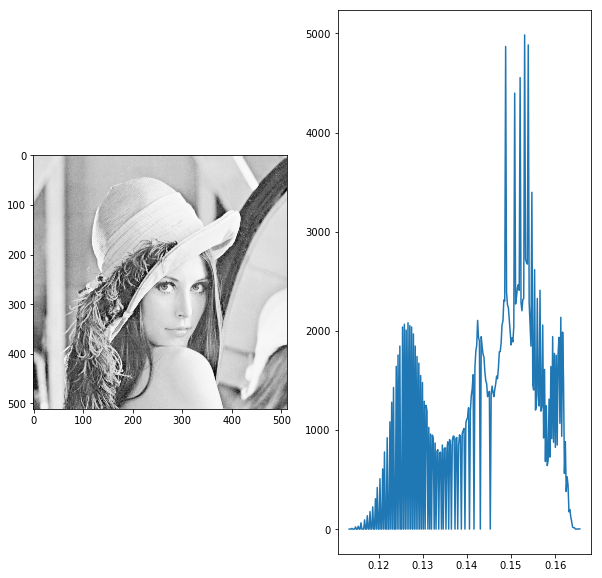

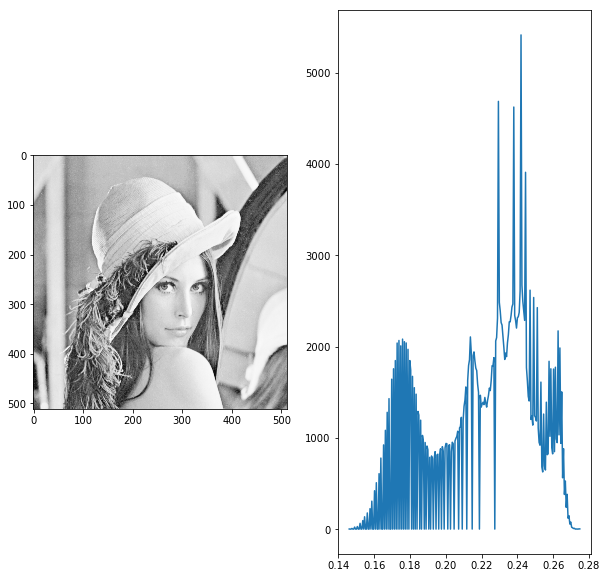

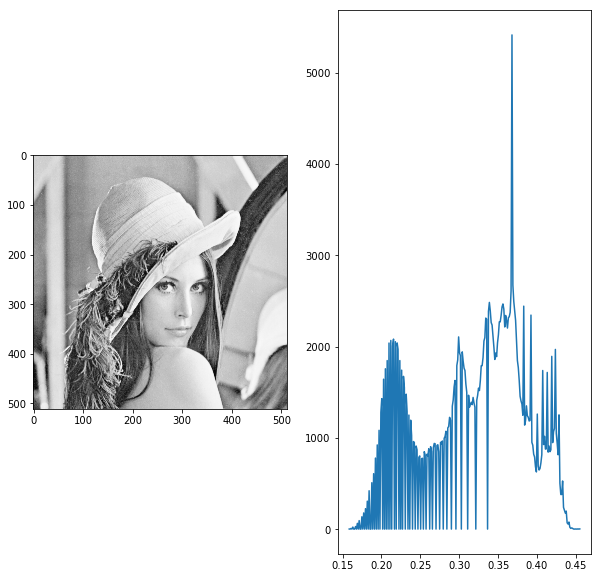

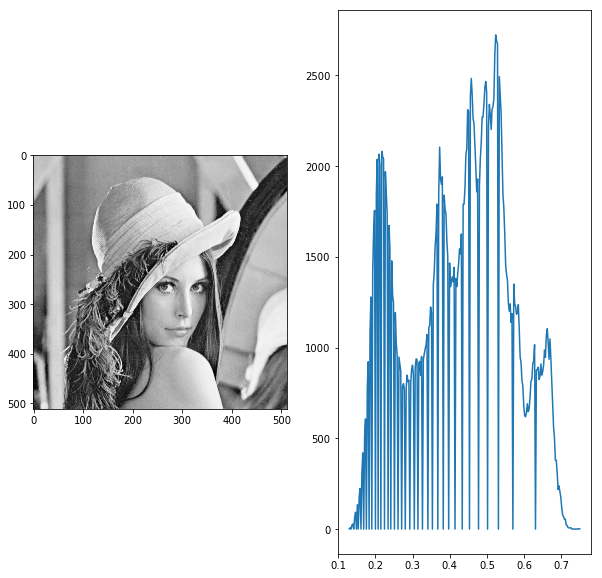

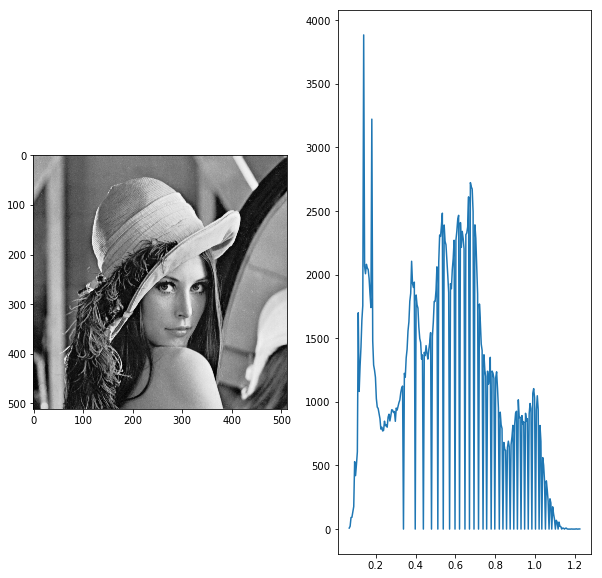

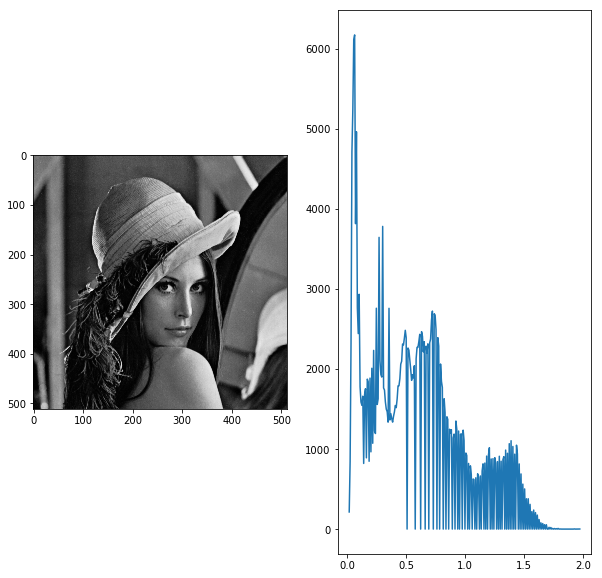

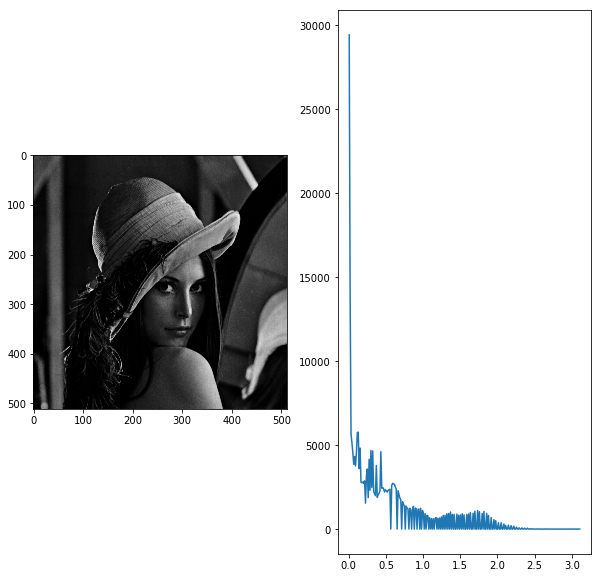

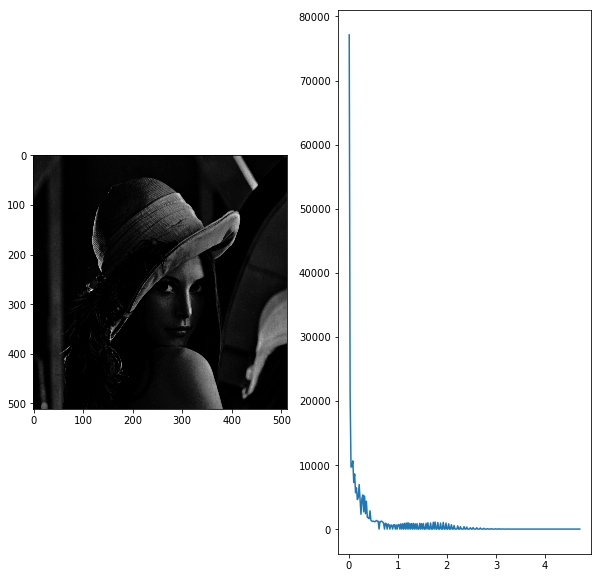

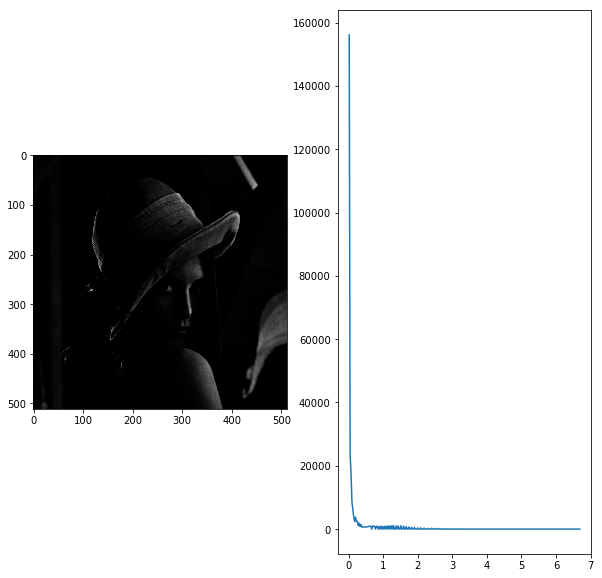

In [42]:
plt_num = 10
gammas = np.logspace(-1, 1., num=plt_num)

# Show the image and its histogram
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(10, 10))
ravels = axes.ravel()
ravels[0].imshow(img_lena_flt, cmap = cm.Greys_r)
ravels[1].plot(htm_lena_flt[1], htm_lena_flt[0])
plt.show()

for index, gamma in enumerate(gammas):
    temp_img = exp.adjust_gamma(img_lena_flt, gamma=gamma, gain=gamma)
    temp_htm = exp.histogram(temp_img)
    fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(10, 10))
    ravels = axes.ravel()
    ravels[0].imshow(temp_img, cmap = cm.Greys_r)
    ravels[1].plot(temp_htm[1], temp_htm[0])
    plt.show()
    #ravels[2 * index + 2].imshow(temp_img, cmap = cm.Greys_r)
    #ravels[2 * index + 3].plot(temp_htm[1], temp_htm[0])

### 2.3  Sigmoid transformation in skimage

This function also can be used for enhancement of the images.

The transformation function is formulated as $s = \frac{1}{1 + \exp{\left(c(t - r)\right)}}$.

We will illustrate the function by varying the parameter $t$.

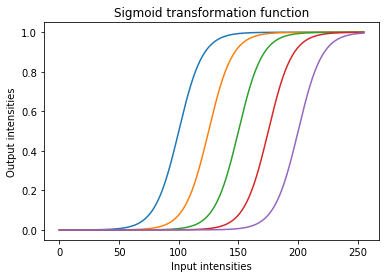

In [43]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='float')

# Define the parameter c
cut_off = np.linspace(100., 200., num=5)

# Plot the transform function
plt.figure()
for t in cut_off:
    plt.plot(x, exposure.adjust_sigmoid(x, cutoff=t, gain=.1))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Sigmoid transformation function')
plt.axis('tight')
plt.show()

**Q.4 Using sigmoid enhancement improve the contrast of the image `satellite.jpg` by setting the cut-off, once you observe the histogram of the image. You can set a gain equal to 10.**

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


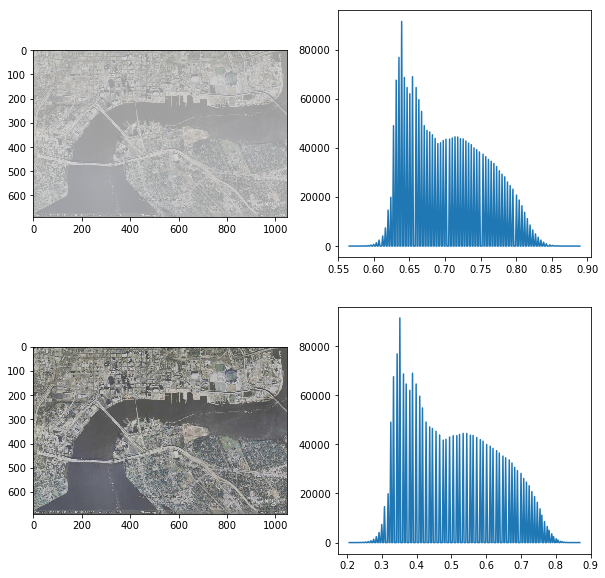

In [63]:
img_sat = io.imread(img_path + img_names[1])
img_sat_flt = img_as_float(img_sat)
htm_sat_flt = exp.histogram(img_sat_flt, 256)

# Show the image and its histogram
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(10, 10))
ravels = axes.ravel()
ravels[0].imshow(img_sat, cmap = cm.Greys_r)
ravels[1].plot(htm_sat_flt[1], htm_sat_flt[0])

img_sat_sig = exp.adjust_sigmoid(img_sat_flt, cutoff=0.7, gain=10)
htm_sat_sig = exp.histogram(img_sat_sig, 256)
ravels[2].imshow(img_sat_sig, cmap = cm.Greys_r)
ravels[3].plot(htm_sat_sig[1], htm_sat_sig[0])

#for i, t in enumerate(cut_off):
    #temp_img = exp.adjust_sigmoid(img_sat_flt, cutoff=t, gain=10)
    #temp_htm = exp.histogram(temp_img, 256)
    #ravels[2*i + 2].imshow(temp_img, cmap = cm.Greys_r)
    #ravels[2*i + 3].plot(temp_htm[1], temp_htm[0])

### 2.4 Contrast stretching in skimage

Taking the satellite image as an example, it can be noticed that the intensitites are included in the range [0.6, 0.8]. A simple contrast stretching can be used to map the value of the intensity range [0.0, 1.0].

The function `exposure.rescale_intensity` is devoted for this purpose.

** Q.5 Stretch the intensity value using this function and show the resulted image and its histogam.**

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


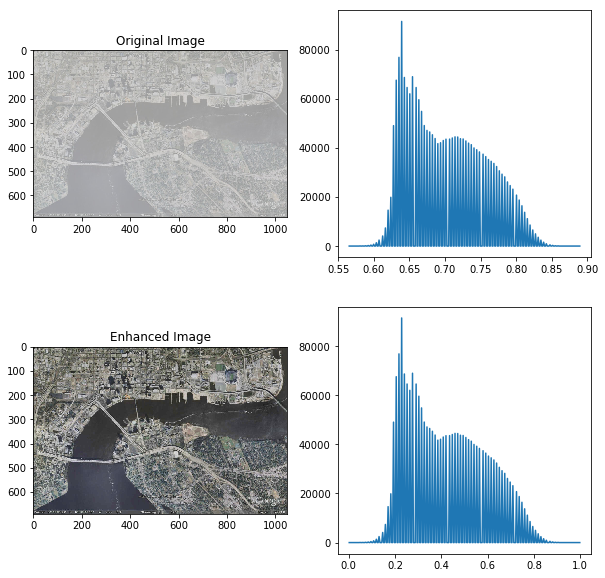

In [70]:
img_sat_str = exp.rescale_intensity(img_sat_flt)
htm_sat_str = exp.histogram(img_sat_str)

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(10, 10))
ravels = axes.ravel()
ravels[0].imshow(img_sat_flt, cmap = cm.Greys_r)
ravels[0].set_title("Original Image")
ravels[1].plot(htm_sat[1], htm_sat[0])
ravels[2].imshow(img_sat_str, cmap = cm.Greys_r)
ravels[2].set_title("Enhanced Image")
ravels[3].plot(htm_sat_str[1], htm_sat_str[0])

### 2.5 Histogram equalization in skimage

Histogram equalization can be used to enhance the contrast in images.

The idea behind the histogram equalization process is that each gray level should have an equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

The `exposure.equalize_hist` provide an optimized implementation for such processing. 

**Q.6 Equalize the histogram of the satellite image, and display the enhanced image and its histogram **

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


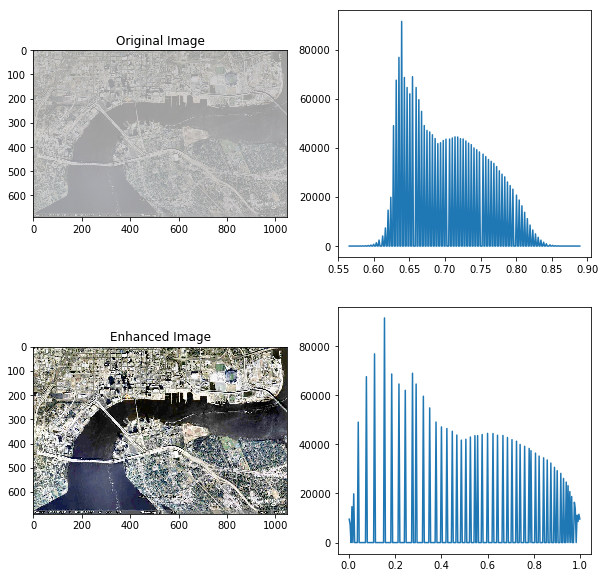

In [71]:
img_sat_eq = exp.equalize_hist(img_sat_flt)
htm_sat_eq = exp.histogram(img_sat_eq)

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(10, 10))
ravels = axes.ravel()
ravels[0].imshow(img_sat_flt, cmap = cm.Greys_r)
ravels[0].set_title("Original Image")
ravels[1].plot(htm_sat[1], htm_sat[0])
ravels[2].imshow(img_sat_eq, cmap = cm.Greys_r)
ravels[2].set_title("Enhanced Image")
ravels[3].plot(htm_sat_eq[1], htm_sat_eq[0])

### 2.6 Adaptive (local) histogram equalization in skimage

The histogram equalization is a global process. The adaptive version allows to perform the histogram equalization for local areas. The contrast will be enhanced in dark and light area of an image which was not possible with the global processing.

The `exposure.equalize_adapthist` function corresponds to this processing in the `skimage`.

**Q.7 Apply this algorithm for the satellite image with the default parameters regarding the region definition.**

/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/okozyn/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


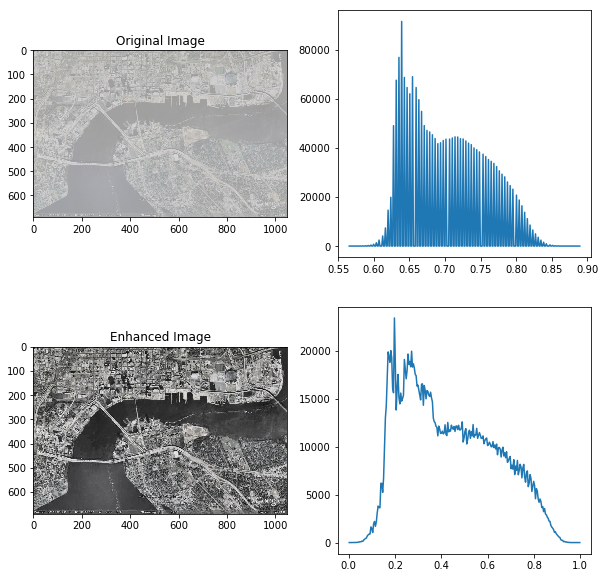

In [72]:
img_sat_adeq = exp.equalize_adapthist(img_sat_flt)
htm_sat_adeq = exp.histogram(img_sat_adeq)

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(10, 10))
ravels = axes.ravel()
ravels[0].imshow(img_sat_flt, cmap = cm.Greys_r)
ravels[0].set_title("Original Image")
ravels[1].plot(htm_sat[1], htm_sat[0])
ravels[2].imshow(img_sat_adeq, cmap = cm.Greys_r)
ravels[2].set_title("Enhanced Image")
ravels[3].plot(htm_sat_adeq[1], htm_sat_adeq[0])

### 2.7 Your own implementation
In this section we want you to write your own enhancement functions. 

**Q.8 Write contrast streching (`con_str`) and histogram equalization (`hist_eq`) functions and apply them again on `satellite` image**

** Q.9 Write a function or set of functions which perform histogram specification or histogram matching between a given image and given histogram and then match the histogram of satelite image to the given pdf `pdf_to_fit`.**

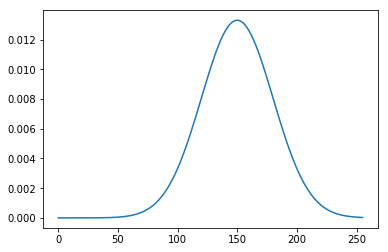

In [61]:
from scipy.stats import norm

x = np.arange(max_img+1)
pdf_to_fit = norm.pdf(x, 150, 30)

plt.figure()
plt.plot(pdf_to_fit)